In [2]:
import requests
import json
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

import mysql.connector
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats

In [639]:
cnx = mysql.connector .connect(
    host = 'robsdb-1.ca2gvew1dd58.us-east-2.rds.amazonaws.com',
    user = 'owen',
    password = 'owen'
)

In [640]:
cursor = cnx.cursor()
cursor.execute('''USE spotify''')

In [16]:
cursor.execute('''SELECT * FROM spotify.spotify_weekly''')
spotify_weekly = pd.DataFrame(cursor.fetchall())
spotify_weekly.columns = [x[0] for x in cursor.description]

In [19]:
artists = spotify_weekly['artist']

In [22]:
u_artists = list(set(list(artists)))

In [24]:
len(u_artists)

660

In [31]:
from spotipy.oauth2 import SpotifyClientCredentials

client_id='2264c5e5d4c1469d812c8097babe7e42'
client_secret='2050b324730b46aea17caa8e51175da9'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spot = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [34]:
def get_artist_info(list_of_artists):
    """Takes a list of artists and makes spotify API call"""
    results = []
    for artist in list_of_artists:
        results.append(spot.search(q=f'{artist}', type="artist", limit=1))
    return results

In [36]:
artist_info = get_artist_info(u_artists)

In [693]:
artist_info[1]

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Halsey&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/26VFTg2z8YR0cCuwLzESi2'},
    'followers': {'href': None, 'total': 9286809},
    'genres': ['dance pop',
     'electropop',
     'etherpop',
     'indie poptimism',
     'pop',
     'post-teen pop'],
    'href': 'https://api.spotify.com/v1/artists/26VFTg2z8YR0cCuwLzESi2',
    'id': '26VFTg2z8YR0cCuwLzESi2',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/1ccc88afcd13131dc35a1bd028922dbc748a55fb',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/8b56979f115e855301c33828bcad2c57280adbab',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ac0a244c45f25b7d177bbe629c30565fe0768f14',
      'width': 160}],
    'name': 'Halsey',
    'popularity': 95,
    'type': 'artist',
    'uri': 'spotify:artist:26VFTg2z8YR0cCuwLzESi2'}],
  'limit': 1,
  

In [105]:
artist_info[1]['artists']['items'][0]['genres']

'dance pop'

In [241]:
music_genres = []

for i in artist_info:
    try:
        music_genres.extend(i['artists']['items'][0]['genres'])
    except:
        continue




In [243]:
#all the different genres
len(music_genres)

2375

In [247]:
#384 unique genres
unique_genres = list(set(music_genres))

In [271]:
music_genres

['dance pop',
 'electropop',
 'etherpop',
 'indie poptimism',
 'pop',
 'post-teen pop',
 'colombian pop',
 'latin',
 'reggaeton',
 'alternative r&b',
 'melodic rap',
 'pop rap',
 'channel islands indie',
 'vapor soul',
 'alternative metal',
 'german metal',
 'industrial',
 'industrial metal',
 'industrial rock',
 'neue deutsche harte',
 'nu metal',
 'adult standards',
 'brill building pop',
 'grupera',
 'mariachi',
 'ranchera',
 'australian hip hop',
 'dance pop',
 'hip pop',
 'pop',
 'pop rap',
 'post-teen pop',
 'pop',
 'pop rock',
 'sertanejo',
 'british soul',
 'pop',
 'uk pop',
 'emo rap',
 'miami hip hop',
 'melodic rap',
 'rap',
 'trap',
 'trap espanol',
 'dance pop',
 'pop',
 'pop rap',
 'atl hip hop',
 'dirty south rap',
 'hip hop',
 'pop rap',
 'rap',
 'southern hip hop',
 'trap',
 'dance pop',
 'pop',
 'pop rock',
 'post-teen pop',
 'dance pop',
 'latin',
 'latin pop',
 'mexican pop',
 'pop',
 'hollywood',
 'show tunes',
 'atl hip hop',
 'hip hop',
 'melodic rap',
 'rap',
 '

In [255]:
artist_tuples = []
for i in artist_info:
    try:
        atuple = (i['artists']['items'][0]['name'], i['artists']['items'][0]['genres'])
        artist_tuples.append(atuple)
    except:
        continue

In [106]:
artist_tuples = []
for i in artist_info:
    try: 
        for j in i['artists']['items'][0]['genres']:
            atuple = (i['artists']['items'][0]['name'], j)
            artist_tuples.append(atuple)
    except:
        continue
        

2375

In [731]:
genre_columns = ['artist', 'genre']
genres = pd.DataFrame(artist_tuples)
genres.columns = [x for x in genre_columns]

In [131]:
genres

,artist,genre
0,Halsey,dance pop
1,Halsey,electropop
2,Halsey,etherpop
3,Halsey,indie poptimism
4,Halsey,pop
...,...,...
2370,Moon Taxi,indie pop
2371,Moon Taxi,indie poptimism
2372,Moon Taxi,indietronica
2373,Moon Taxi,modern rock


In [73]:
df[0].value_counts()

pop                      198
dance pop                124
pop rap                  114
rap                      105
post-teen pop             79
                        ... 
italo dance                1
deep talent show           1
swedish gangsta rap        1
australian electropop      1
movie tunes                1
Name: 0, Length: 384, dtype: int64

In [93]:
cursor.execute("""SELECT * from spotify.spotify_weekly
""")
spotify_weekly = pd.DataFrame(cursor.fetchall())
spotify_weekly.columns = [x[0] for x in cursor.description]

In [94]:
spotify_weekly

,id,week_of,chart_position,track_name,artist,num_of_streams
0,7qiZfU4dY1lWllzX7mPBI3,0,1,Shape of You,Ed Sheeran,64275251
1,0afhq8XCExXpqazXczTSve,0,2,Galway Girl,Ed Sheeran,31104147
2,3eR23VReFzcdmS7TYCrhCe,0,3,It Ain't Me (with Selena Gomez),Kygo,30924578
3,6PCUP3dWmTjcTtXY02oFdT,0,4,Castle on the Hill,Ed Sheeran,30879091
4,6RUKPb4LETWmmr3iAEQktW,0,5,Something Just Like This,The Chainsmokers,30048981
...,...,...,...,...,...,...
30990,2E82gORVSA7UMEz5M1IP3b,154,196,Punto G,KAROL G,4461128
30991,09oZ9eXQ2fo6YDrPzJqAoP,154,197,Outta My Head (with John Mayer),Khalid,4460060
30992,2374M0fQpWi3dLnB54qaLX,154,198,Africa,TOTO,4433481
30993,08bNPGLD8AhKpnnERrAc6G,154,199,FRIENDS,Marshmello,4430014


In [95]:
cursor.execute("""SELECT * from spotify.audio_features
""")
audio_features = pd.DataFrame(cursor.fetchall())
audio_features.columns = [x[0] for x in cursor.description]

In [ ]:
[0.02295749, 0.20407127, 0.        , 0.08269756, 0.00836639, 0.00318028, 0.08323431, 0.50113176, 0.0334906 , 0.,0.06087033])

In [113]:
audio_features

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,000xQL6tZNLJzIrtIgxqSl,0.748,0.627,-6.029,0.064,0.131,0.000,0.085,0.524,120.963,188491,4.000
1,003eoIwxETJujVWmNFMoZy,0.353,0.755,-6.276,0.733,0.082,0.000,0.390,0.437,191.153,193680,4.000
2,00B7TZ0Xawar6NZ00JFomN,0.62,0.625,-7.438,0.553,0.287,0.000,0.314,0.665,167.911,284856,4.000
3,00EPIEnX1JFjff8sC6bccd,0.836,0.799,-4.247,0.087,0.187,0.000,0.092,0.772,94.033,217653,4.000
4,00gpGR84M27moP7AFuqHIx,0.857,0.560,-8.278,0.173,0.043,0.000,0.153,0.482,94.949,91011,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...
3024,7yyRTcZmCiyzzJlNzGC9Ol,0.886,0.525,-7.390,0.131,0.236,0.000,0.057,0.708,145.990,225205,4.000
3025,7zgqtptZvhf8GEmdsM2vp2,0.615,0.779,-6.454,0.135,0.067,0.000,0.155,0.453,160.000,208198,4.000
3026,7zTx8ePYAmPFQuxP3xlXZn,0.57,0.763,-4.137,0.057,0.086,0.000,0.093,0.430,150.088,239853,4.000
3027,7zVCrzzEJU7u24sbJPXA5W,0.612,0.799,-4.603,0.028,0.009,0.000,0.172,0.687,125.976,188253,4.000


In [97]:
cursor.execute("""SELECT * from spotify.album_features
""")
album_features = pd.DataFrame(cursor.fetchall())
album_features.columns = [x[0] for x in cursor.description]

In [98]:
album_features

,artist_name,artist_id,popularity,explicit,num_songs,album_id,album_name,release_date
0,TWICE,7n2Ycct7Beij7Dj7meI4X0,66,0,7,0o1uFxZ1VTviqvNaYkTJek,The Freewheelin' Bob Dylan,1963-05-27
1,JAY-Z,3nFkdlSjzX9mRTtwJOzDYB,59,1,1,7GoZNNb7Yl74fpk8Z6I2cv,4:44,2017-07-07
2,The Pogues,2wzMOQwNT6ZvVB4amvhFAH,86,0,4,4V92Puney9WxGPecKtLG4L,If I Should Fall From Grace With God (Expande,1988-09-05
3,Mac Miller,4LLpKhyESsyAXpc4laK94U,73,0,1,5wtE5aLX5r7jOosmPhJhhk,Swimming,2018-08-03
4,Tiësto,2o5jDhtHVPhrJdv3cEQ99Z,83,0,1,2T0NPRcdhIt71ifDWm328R,God Is A Dancer (with Mabel),2019-09-20
...,...,...,...,...,...,...,...,...
6461,*NSYNC,6Ff53KvcvAj5U7Z1vojB5o,55,0,11,6uIB97CqMcssTss9WrtX8c,Home For Christmas,1998-10-30
6462,Jennifer Lopez,2DlGxzQSjYe5N6G9nkYghR,60,1,16,76QqoE30i9HVwxtxYMkWXT,J.Lo,2001-01-23
6463,TWICE,7n2Ycct7Beij7Dj7meI4X0,73,0,1,47d5aGM6oRKMvabeH5oICz,YES or YES,2018-11-05
6464,Rauw Alejandro,1mcTU81TzQhprhouKaTkpq,76,0,1,5NC9EpoBx72YRbGhlHWMPa,Que Le De,2019-01-25


In [110]:
genres

,artists,genres
0,Halsey,dance pop
1,Halsey,electropop
2,Halsey,etherpop
3,Halsey,indie poptimism
4,Halsey,pop
...,...,...
2370,Moon Taxi,indie pop
2371,Moon Taxi,indie poptimism
2372,Moon Taxi,indietronica
2373,Moon Taxi,modern rock


In [117]:
song_attributes = pd.merge(spotify_weekly, audio_features, how='outer', on='id')

In [118]:
song_attributes

,id,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,7qiZfU4dY1lWllzX7mPBI3,0,1.0,Shape of You,Ed Sheeran,64275251.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.000
1,7qiZfU4dY1lWllzX7mPBI3,1,1.0,Shape of You,Ed Sheeran,51095759.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.000
2,7qiZfU4dY1lWllzX7mPBI3,2,49.0,Shape of You,Ed Sheeran,9077750.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.000
3,7qiZfU4dY1lWllzX7mPBI3,3,92.0,Shape of You,Ed Sheeran,7167638.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.000
4,7qiZfU4dY1lWllzX7mPBI3,4,88.0,Shape of You,Ed Sheeran,7138334.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30995,1YqcGlCHNquxBhlUZsjhMT,NaN,NaN,NaN,NaN,NaN,0.728,0.810,-5.200,0.059,0.224,0.000,0.095,0.784,171.083,190328,4.000
30996,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,NaN,NaN,NaN,0.644,0.531,-6.591,0.067,0.105,0.000,0.084,0.524,100.028,220839,4.000
30997,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,NaN,NaN,NaN,0.948,0.405,-6.516,0.080,0.191,0.000,0.080,0.728,121.021,214700,4.000
30998,3RXkboS74UYzN14xTqzPyY,NaN,NaN,NaN,NaN,NaN,0.543,0.661,-5.855,0.054,0.214,0.000,0.241,0.556,144.967,194978,4.000


In [193]:
song_attributes_genre = pd.merge(song_attributes, genres, how='outer', on='artist')

In [192]:
#expanding the song attributes by adding in genre, new entry for each genre
song_attributes_genre

,id,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre
0,7qiZfU4dY1lWllzX7mPBI3,0,1.0,Shape of You,Ed Sheeran,64275251.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713.0,4.000,pop
1,7qiZfU4dY1lWllzX7mPBI3,0,1.0,Shape of You,Ed Sheeran,64275251.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713.0,4.000,uk pop
2,7qiZfU4dY1lWllzX7mPBI3,1,1.0,Shape of You,Ed Sheeran,51095759.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713.0,4.000,pop
3,7qiZfU4dY1lWllzX7mPBI3,1,1.0,Shape of You,Ed Sheeran,51095759.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713.0,4.000,uk pop
4,7qiZfU4dY1lWllzX7mPBI3,2,49.0,Shape of You,Ed Sheeran,9077750.0,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713.0,4.000,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112341,NaN,NaN,NaN,NaN,Isaiah Rashad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rap
112342,NaN,NaN,NaN,NaN,Isaiah Rashad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,underground hip hop
112343,NaN,NaN,NaN,NaN,Moneybagg Yo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rap
112344,NaN,NaN,NaN,NaN,Moneybagg Yo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,southern hip hop


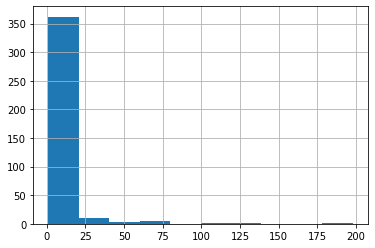

In [148]:
genres['genre'].value_counts().hist()

In [154]:
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [208]:
song_attributes_genre.dropna(inplace=True)

In [209]:
target = song_attributes_genre['genre']
data = song_attributes_genre.drop(columns = ['genre', 'id', 'week_of', 'track_name', 'artist', 'num_of_streams'])

In [210]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

In [211]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)



In [213]:
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [215]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [221]:
print(precision_score(y_test, test_preds,pos_label='positive',average='micro'))
print(recall_score(y_test, test_preds,pos_label='positive',average='micro'))
print(accuracy_score(y_test, test_preds))


0.09845945367662791
0.09845945367662791
0.09845945367662791


In [495]:
for i in range(len(genres['genre'])):
    if 'pop' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'rock' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'rap' in genres['genre'][i]:
        genres['genre'][i] = 'Hip_Hop'
    elif 'hip hop' in genres['genre'][i]:
        genres['genre'][i] = 'Hip_Hop'
    elif 'metal' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'house' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'dance' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'latin' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'reggae' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'edm' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'tropical' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'techno' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'r&b' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'indie' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'soul' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'country' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'funk' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'room' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'jazz' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'mellow' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'disco' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'elec' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'punk' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'trance' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'wave' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'salsa' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'standard' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'hollywood' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'storm' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'show' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'song' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'urban' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'band' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'group' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    
    

    
        

In [513]:
#2375 total, when the top 5 add up to about 2000 then good enough
genres['genre'].value_counts()

Pop                  908
Hip_Hop              601
EDM                  273
Rock                 253
Latin                151
                    ... 
grupera              1  
grime                1  
cubaton              1  
madchester           1  
post-romantic era    1  
Name: genre, Length: 69, dtype: int64

In [877]:
genres_a = genres[genres.groupby('genre').genre.transform('count')>10].copy()

In [514]:
genres_c['genre'].value_counts()

Pop        908
Hip_Hop    601
EDM        273
Rock       253
Latin      151
R&B        83 
Name: genre, dtype: int64

In [543]:
song_attributes_genre2 = pd.merge(song_attributes, genres_c, how='outer', on='artist')

In [546]:
song_attributes_genre2.dropna(inplace=True)

In [553]:
target = song_attributes_genre2['genre']
data = song_attributes_genre2.drop(columns = ['genre', 'id', 'week_of', 'track_name', 'artist', 'num_of_streams'])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)


In [554]:
clf = KNeighborsClassifier()
clf.fit(scaled_data_train, y_train)
test_preds = clf.predict(scaled_data_test)
print(precision_score(y_test, test_preds,pos_label='positive',average='micro'))
print(recall_score(y_test, test_preds,pos_label='positive',average='micro'))
print(accuracy_score(y_test, test_preds))


0.731232757368956
0.731232757368956
0.731232757368956


/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [552]:
#attribute averages per genre, there are differences
song_attributes_genre2.groupby('genre').mean()

,chart_position,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
genre,,,,,,,,,,,,,
EDM,99.380824,7.802252e+06,0.690905,0.739638,-4.759680,0.070608,0.161711,0.004328,0.166899,0.523611,114.283970,206026.424361,3.985227
Hip_Hop,101.689405,8.032485e+06,0.762133,0.602388,-6.496593,0.171548,0.168332,0.003868,0.173708,0.447622,125.692843,212681.058664,4.007202
Latin,100.630366,7.437191e+06,0.752204,0.744570,-4.503937,0.112257,0.208242,0.000267,0.170724,0.657058,117.712924,224204.989355,3.998947
Pop,99.599603,8.054065e+06,0.678424,0.645014,-5.863843,0.098800,0.212514,0.004528,0.159614,0.505806,117.007205,210181.425887,3.970668
R&B,108.722715,7.303723e+06,0.625835,0.584404,-6.959079,0.123745,0.304324,0.017194,0.137393,0.429671,121.807807,224490.690862,3.956658
Rock,121.902281,6.577627e+06,0.620591,0.658875,-7.069298,0.072797,0.221435,0.020154,0.192243,0.548617,124.345958,221255.411830,3.957723


In [556]:
song_attributes_genre2

,id,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,genre
0,7qiZfU4dY1lWllzX7mPBI3,0,1.0,Shape of You,Ed Sheeran,64275251.0,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713.0,4.0,Pop
1,7qiZfU4dY1lWllzX7mPBI3,0,1.0,Shape of You,Ed Sheeran,64275251.0,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713.0,4.0,Pop
2,7qiZfU4dY1lWllzX7mPBI3,1,1.0,Shape of You,Ed Sheeran,51095759.0,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713.0,4.0,Pop
3,7qiZfU4dY1lWllzX7mPBI3,1,1.0,Shape of You,Ed Sheeran,51095759.0,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713.0,4.0,Pop
4,7qiZfU4dY1lWllzX7mPBI3,2,49.0,Shape of You,Ed Sheeran,9077750.0,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713.0,4.0,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110429,0AcHbiMs86CCgprvc7E1gs,148,175.0,i Shyne,Carnage,4154936.0,0.776,0.732,-3.719,0.081,0.175,0.0,0.364,0.383,144.076,153351.0,4.0,Pop
110430,0AcHbiMs86CCgprvc7E1gs,148,175.0,i Shyne,Carnage,4154936.0,0.776,0.732,-3.719,0.081,0.175,0.0,0.364,0.383,144.076,153351.0,4.0,Hip_Hop
110431,0AcHbiMs86CCgprvc7E1gs,148,175.0,i Shyne,Carnage,4154936.0,0.776,0.732,-3.719,0.081,0.175,0.0,0.364,0.383,144.076,153351.0,4.0,Hip_Hop
110432,0AcHbiMs86CCgprvc7E1gs,148,175.0,i Shyne,Carnage,4154936.0,0.776,0.732,-3.719,0.081,0.175,0.0,0.364,0.383,144.076,153351.0,4.0,Hip_Hop


In [550]:
#turn data from objects into floats
song_attributes_genre2[['tempo','energy','danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration', 'time_signature']] = song_attributes_genre2[['tempo','energy','danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration', 'time_signature']].astype(float)

In [559]:
import random

In [638]:
credentials = spotipy.oauth2.SpotifyClientCredentials(client_id='d1752e10625849959f530b56af4458e0', client_secret='057f9a3c8e584dbd9b6c27cf2a224963')
spotify = spotipy.Spotify(client_credentials_manager=credentials)
spotify.audio_features(['18GiV1BaXzPVYpp9rmOg0E'])

[{'danceability': 0.38,
  'energy': 0.0993,
  'key': 2,
  'loudness': -20.567,
  'mode': 1,
  'speechiness': 0.0509,
  'acousticness': 0.914,
  'instrumentalness': 2.32e-05,
  'liveness': 0.0605,
  'valence': 0.44,
  'tempo': 174.874,
  'type': 'audio_features',
  'id': '18GiV1BaXzPVYpp9rmOg0E',
  'uri': 'spotify:track:18GiV1BaXzPVYpp9rmOg0E',
  'track_href': 'https://api.spotify.com/v1/tracks/18GiV1BaXzPVYpp9rmOg0E',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/18GiV1BaXzPVYpp9rmOg0E',
  'duration_ms': 165427,
  'time_signature': 4}]

In [633]:
album = spotify.album_tracks('0o1uFxZ1VTviqvNaYkTJek')

In [689]:
album['items']

[{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
    'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
    'id': '74ASZWbe4lXaubB36ztrGX',
    'name': 'Bob Dylan',
    'type': 'artist',
    'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
  'available_markets': ['AD',
   'AE',
   'AR',
   'AT',
   'AU',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JO',
   'JP',
   'KW',
   'LB',
   'LI',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL',
   'PS',
   'PT',
   'PY',
   'QA',
   'RO',
   'SA',
   'SE',
   'SG',
   'SK',
   'SV',
   'TH',
   'TN',
   'TR',


In [641]:
cursor.execute('''SELECT * FROM spotify.album_features''')
albums = pd.DataFrame(cursor.fetchall())
albums.columns = [x[0] for x in cursor.description]

In [642]:
albums.head()

,artist_name,artist_id,popularity,explicit,num_songs,album_id,album_name,release_date
0,TWICE,7n2Ycct7Beij7Dj7meI4X0,66,0,7,0o1uFxZ1VTviqvNaYkTJek,The Freewheelin' Bob Dylan,1963-05-27
1,JAY-Z,3nFkdlSjzX9mRTtwJOzDYB,59,1,1,7GoZNNb7Yl74fpk8Z6I2cv,4:44,2017-07-07
2,The Pogues,2wzMOQwNT6ZvVB4amvhFAH,86,0,4,4V92Puney9WxGPecKtLG4L,If I Should Fall From Grace With God (Expande,1988-09-05
3,Mac Miller,4LLpKhyESsyAXpc4laK94U,73,0,1,5wtE5aLX5r7jOosmPhJhhk,Swimming,2018-08-03
4,Tiësto,2o5jDhtHVPhrJdv3cEQ99Z,83,0,1,2T0NPRcdhIt71ifDWm328R,God Is A Dancer (with Mabel),2019-09-20


In [691]:
spotify.album_tracks('0o1uFxZ1VTviqvNaYkTJek')

retrying ...1secs
retrying ...1secs


{'href': 'https://api.spotify.com/v1/albums/0o1uFxZ1VTviqvNaYkTJek/tracks?offset=0&limit=50',
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
     'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
     'id': '74ASZWbe4lXaubB36ztrGX',
     'name': 'Bob Dylan',
     'type': 'artist',
     'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
    'NZ

In [644]:
album_ids = list(albums['album_id'])

In [863]:
album_tracks = []
for i in range(0,len(album_ids)):
    a = spotify.album_tracks(album_ids[i])
    item = a['items']
    album_tracks.extend(item)
   
        

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


SSLError: HTTPSConnectionPool(host='api.spotify.com', port=443): Max retries exceeded with url: /v1/albums/2AvupjUeMnSffKEV05x222/tracks/?limit=50&offset=0 (Caused by SSLError(SSLError("bad handshake: SysCallError(54, 'ECONNRESET')")))

In [865]:
album_tracks[0]

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
   'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
   'id': '74ASZWbe4lXaubB36ztrGX',
   'name': 'Bob Dylan',
   'type': 'artist',
   'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'disc_number': 1,
 'duration_ms': 1654

In [655]:
len(song_ids)

55518

In [669]:
song_info = []
for i in range(2074,len(song_ids)):
    song = spotify.audio_features([song_ids[i]])
    song_info.append(song)

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


ConnectionError: HTTPSConnectionPool(host='api.spotify.com', port=443): Max retries exceeded with url: /v1/audio-features/?ids=5DF8aOiluuS6NanUp8teu0 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1c2fba9c90>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
pd.DataFrame(spotify.audio_features([song_ids[10]]))

In [670]:
len(song_info)

27894

In [686]:
columns = ['id', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
more_songs = pd.DataFrame(feature_tuples, columns=columns)

In [684]:
feature_tuples = []
for i in range(0,len(song_info)):
    song_tuple = (song_info[i][0]['id'],song_info[i][0]['danceability'], 
                  song_info[i][0]['energy'],song_info[i][0]['loudness'],
                  song_info[i][0]['speechiness'],
                  song_info[i][0]['acousticness'], song_info[i][0]['instrumentalness'],
                  song_info[i][0]['liveness'], song_info[i][0]['valence'],
                  song_info[i][0]['tempo'], song_info[i][0]['duration_ms'],
                  song_info[i][0]['time_signature'])
    feature_tuples.append(song_tuple)

In [687]:
more_songs

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1eLSF6HfrRA0AsNmTkUlKx,0.566,0.724,-4.574,0.3230,0.00102,0.000000,0.1580,0.407,81.774,225267,4
1,4FpfU1O7WCLBnmwu5XAFk4,0.549,0.449,-13.645,0.1040,0.66200,0.000049,0.0866,0.223,121.164,85267,4
2,76iVOVsliCHlWqKuDnCfhE,0.778,0.765,-7.175,0.1280,0.13900,0.027400,0.1230,0.642,125.062,222093,4
3,35cOyocq8Gb6UcT0NWeTwn,0.629,0.554,-6.759,0.3260,0.28000,0.000000,0.1580,0.308,126.694,242293,4
4,5cXg9IQS34FzLVdHhp7hu7,0.855,0.478,-9.116,0.1930,0.00759,0.000000,0.1010,0.284,130.018,221827,4
...,...,...,...,...,...,...,...,...,...,...,...,...
27889,1f1Sz6YrEcu9ytZggMnb9j,0.653,0.857,-4.790,0.0438,0.00177,0.000000,0.0392,0.319,133.966,181680,4
27890,6jm5eRKjYVr1CEbnXSdcCp,0.620,0.570,-4.205,0.0998,0.05960,0.000000,0.0901,0.473,89.975,217600,4
27891,19heOl2MptvLeIUkKRtVCz,0.686,0.859,-2.603,0.0555,0.10900,0.000000,0.3130,0.878,175.995,204520,4
27892,5mZFUo2UjeHmHvFsYmh6MJ,0.617,0.641,-5.628,0.0417,0.04960,0.000000,0.0877,0.388,95.886,221187,4


In [720]:
album_artists = []
for i in range(0,len(album_tracks)):
    name = album_tracks[i]['artists'][0]['name']
    album_artists.append(name)

In [812]:
album_tracks[0][]

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
   'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
   'id': '74ASZWbe4lXaubB36ztrGX',
   'name': 'Bob Dylan',
   'type': 'artist',
   'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'disc_number': 1,
 'duration_ms': 1654

In [721]:
u_album_artists = list(set(album_artists))
len(u_album_artists)

2446

In [725]:
album_artist_info =  get_artist_info(u_album_artists)

retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [858]:
album_artist_info[0]['artists']['items'][0]['name']

'Baby Consuelo'

In [727]:
album_music_genres = []

for i in album_artist_info:
    try:
        album_music_genres.extend(i['artists']['items'][0]['genres'])
    except:
        continue

In [733]:
album_artist_tuples = []
for i in album_artist_info:
    try: 
        for j in i['artists']['items'][0]['genres']:
            atuple = (i['artists']['items'][0]['name'], j)
            album_artist_tuples.append(atuple)
    except:
        continue

In [848]:
album_artist_info[0]

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Baby+Consuelo&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5bWKD8zeNym1F1JsJkNrEA'},
    'followers': {'href': None, 'total': 231},
    'genres': [],
    'href': 'https://api.spotify.com/v1/artists/5bWKD8zeNym1F1JsJkNrEA',
    'id': '5bWKD8zeNym1F1JsJkNrEA',
    'images': [],
    'name': 'Baby Consuelo',
    'popularity': 16,
    'type': 'artist',
    'uri': 'spotify:artist:5bWKD8zeNym1F1JsJkNrEA'}],
  'limit': 1,
  'next': 'https://api.spotify.com/v1/search?query=Baby+Consuelo&type=artist&offset=1&limit=1',
  'offset': 0,
  'previous': None,
  'total': 5}}

In [740]:
genre_columns = ['artist', 'genre']
genres = pd.DataFrame(album_artist_tuples)
genres.columns = [x for x in genre_columns]

In [746]:
genres['genre'].value_counts()

Pop                  2277
Rock                 1487
Hip_Hop              1294
EDM                  895 
R&B                  577 
                    ...  
merengue             1   
brega                1   
freestyle            1   
classic bollywood    1   
post-hardcore        1   
Name: genre, Length: 312, dtype: int64

In [802]:
for i in range(len(genres['genre'])):
    if 'pop' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'rock' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'rap' in genres['genre'][i]:
        genres['genre'][i] = 'Hip_Hop'
    elif 'hip hop' in genres['genre'][i]:
        genres['genre'][i] = 'Hip_Hop'
    elif 'metal' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'house' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'dance' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'latin' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'reggae' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'edm' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'tropical' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'techno' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'r&b' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'indie' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'soul' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'country' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'funk' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'room' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'jazz' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'mellow' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'disco' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'elec' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'punk' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'trance' in genres['genre'][i]:
        genres['genre'][i] = 'EDM'
    elif 'wave' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'salsa' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'standard' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'hollywood' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'storm' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'show' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'song' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'urban' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'band' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'group' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'folk' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'lounge' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'roman' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'town' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'easy' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'roman' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'blue' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'mex' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'bebop' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'bachata' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'norteno' in genres['genre'][i]:
        genres['genre'][i] = 'Latin'
    elif 'broad' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'movie' in genres['genre'][i]:
        genres['genre'][i] = 'Pop'
    elif 'swing' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    elif 'grunge' in genres['genre'][i]:
        genres['genre'][i] = 'Rock'
    elif 'bop' in genres['genre'][i]:
        genres['genre'][i] = 'R&B'
    
    

In [803]:
list(genres['genre'].value_counts())

[2430,
 1549,
 1294,
 895,
 727,
 342,
 26,
 16,
 14,
 13,
 12,
 11,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [804]:
genres['genre'].value_counts().index

Index(['Pop', 'Rock', 'Hip_Hop', 'EDM', 'R&B', 'Latin', 'R%B', 'classical',
       'brostep', 'grupera',
       ...
       'go-go', 'muzica crestina', 'glee club', 'honky tonk',
       'irish classical', 'bassline', 'polca paraguaya',
       'franco-flemish school', 'otacore', 'classic opm'],
      dtype='object', length=263)

In [861]:
album_artist_info[0]

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Baby+Consuelo&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5bWKD8zeNym1F1JsJkNrEA'},
    'followers': {'href': None, 'total': 231},
    'genres': [],
    'href': 'https://api.spotify.com/v1/artists/5bWKD8zeNym1F1JsJkNrEA',
    'id': '5bWKD8zeNym1F1JsJkNrEA',
    'images': [],
    'name': 'Baby Consuelo',
    'popularity': 16,
    'type': 'artist',
    'uri': 'spotify:artist:5bWKD8zeNym1F1JsJkNrEA'}],
  'limit': 1,
  'next': 'https://api.spotify.com/v1/search?query=Baby+Consuelo&type=artist&offset=1&limit=1',
  'offset': 0,
  'previous': None,
  'total': 5}}

In [871]:
album_track_tuples = []
for i in album_tracks:
    atuple = (i['name'], i['id'], i['explicit'], i['artists'][0]['name'])
    album_track_tuples.append(atuple)


In [870]:
album_tracks[0]['artists'][0]['name']

'Bob Dylan'

In [873]:
genre_columns = ['track', 'id', 'explicit', 'artist']
album_tracks_df = pd.DataFrame(album_track_tuples)
album_tracks_df.columns = [x for x in genre_columns]

In [875]:
album_tracks_df

,track,id,explicit,artist
0,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,False,Bob Dylan
1,Girl from the North Country,739sLmfUkVFoyPtb0C3263,False,Bob Dylan
2,Masters of War,7xVpkVkd1klTzLJEysIR7z,False,Bob Dylan
3,Down the Highway,7fzLfsWsXVvStzsk9yRfbG,False,Bob Dylan
4,Bob Dylan's Blues,1xa66kvw6zwboiW7c8W9t8,False,Bob Dylan
...,...,...,...,...
40309,MIDDLE CHILD,2b5scDVCDxVsLalecDLAo2,True,J. Cole
40310,"PTSD (with Omen feat. Mereba, Deante' Hitchcock & St. Beauty)",5KUciA17ZXudpvWAc3mLHs,True,Dreamville
40311,Sacrifices (with EARTHGANG & J. Cole feat. Smino & Saba),7wTA0NKIm6T7nP2kaymU2a,True,Dreamville
40312,Vou Te Machucar,6ZkC6bFOFOZxKLRRtjLvxm,False,Dadá Boladão


In [914]:
tracks_att = pd.merge(album_tracks_df, more_songs, how='outer', on='id')

In [915]:
tracks_att_genre = pd.merge(tracks_att, genres_a, how='outer', on='artist' )

In [916]:
tracks_att_genre

,track,id,explicit,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,False,Bob Dylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
1,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,False,Bob Dylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
2,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,False,Bob Dylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
3,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,False,Bob Dylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
4,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,False,Bob Dylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,NaN,NaN,NaN,Robin Thicke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop
290972,NaN,NaN,NaN,Robin Thicke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R&B
290973,NaN,NaN,NaN,Robin Thicke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop
290974,NaN,NaN,NaN,Robin Thicke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R&B


In [884]:
song_attributes_genre.columns

Index(['id', 'week_of', 'chart_position', 'track_name', 'artist',
       'num_of_streams', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'time_signature', 'genre'],
      dtype='object')

In [920]:
tracks_att_genre.rename(mapper = {'duration_ms':'duration', 'track': 'track_name'}, axis=1, inplace=True)

In [938]:
all_songs_att = pd.concat([tracks_att_genre.dropna(), song_attributes_genre2.dropna()])

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [937]:
tracks_att_genre['genre'].value_counts()

Hip_Hop    103462
Pop        97820 
Rock       38854 
EDM        19236 
R&B        18356 
Latin      8899  
Name: genre, dtype: int64

In [946]:
songs4algs = all_songs_att.drop(columns = ['chart_position', 'explicit', 'num_of_streams', 'week_of'])

In [947]:
songs4algs.isna().mean()

acousticness        0.0
artist              0.0
danceability        0.0
duration            0.0
energy              0.0
genre               0.0
id                  0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
track_name          0.0
valence             0.0
dtype: float64

In [936]:
tracks_att_genre = tracks_att_genre[tracks_att_genre.groupby('genre').genre.transform('count')>500].copy()

### KNN Categorization

In [949]:
target = songs4algs['genre']
data = songs4algs.drop(columns = ['genre', 'id','track_name', 'artist'])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [972]:
clf = KNeighborsClassifier()
clf.fit(scaled_data_train, y_train)
test_preds = clf.predict(scaled_data_test)
print(precision_score(y_test, test_preds,pos_label='positive',average='micro'))
print(recall_score(y_test, test_preds,pos_label='positive',average='micro'))
print(accuracy_score(y_test, test_preds))
print(f1_score(y_test, test_preds, average='weighted'))


/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.7467524868344061
0.7467524868344061
0.7467524868344061
0.7445450418441664


### XGBoost

In [951]:
from xgboost import XGBClassifier

In [952]:
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 61.71%
Validation accuracy: 61.58%


### Random Forest

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [4]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(scaled_data_train, y_train)

NameError: name 'scaled_data_train' is not defined

In [957]:
#relative importances of genre determinants, correspond to data
tree_clf.feature_importances_

array([0.02295749, 0.20407127, 0.        , 0.08269756, 0.00836639,
       0.00318028, 0.08323431, 0.50113176, 0.0334906 , 0.        ,
       0.06087033])

In [962]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
pred = tree_clf.predict(scaled_data_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'tree_clf' is not defined

In [964]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(scaled_data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [965]:
#Training accuracy of training data
forest.score(scaled_data_train, y_train)

0.5542918949589517

In [966]:
#Testing accuracy of testing data
forest.score(scaled_data_test, y_test)


0.5548912176179585

In [1]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(tree_clf)

NameError: name 'tree_clf' is not defined

### Improving Random Forest with Gridsearch

In [969]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [967]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [970]:
dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                   

In [971]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 57.22%
Mean Test Score: 38.75%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Exploratory Data Analysis

In [973]:
import seaborn as sns

In [990]:
songs4algs.columns

Index(['acousticness', 'artist', 'danceability', 'duration', 'energy', 'genre',
       'id', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'track_name', 'valence'],
      dtype='object')

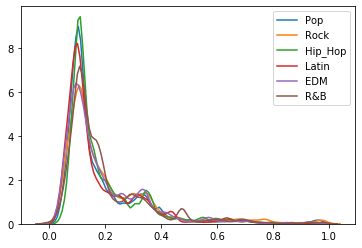

In [994]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['liveness'], label='Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['liveness'], label= 'Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['liveness'], label= 'Hip_Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['liveness'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['liveness'], label= 'EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['liveness'], label= 'R&B')

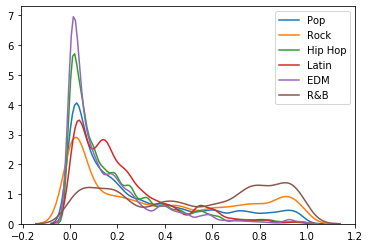

In [995]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['acousticness'], label='Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['acousticness'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['acousticness'], label='Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['acousticness'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['acousticness'], label= 'EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['acousticness'], label='R&B')

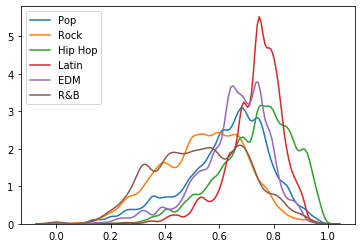

In [996]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['danceability'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['danceability'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['danceability'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['danceability'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['danceability'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['danceability'], label='R&B')

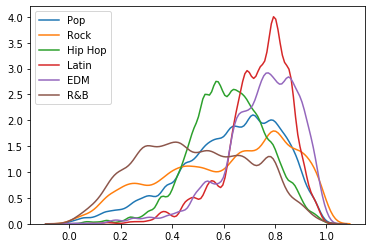

In [997]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['energy'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['energy'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['energy'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['energy'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['energy'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['energy'], label='R&B')

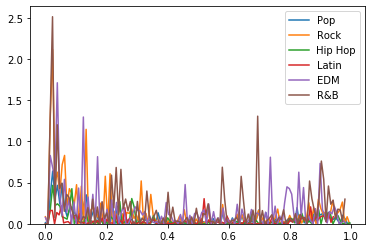

In [998]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['instrumentalness'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['instrumentalness'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['instrumentalness'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['instrumentalness'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['instrumentalness'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['instrumentalness'], label='R&B')

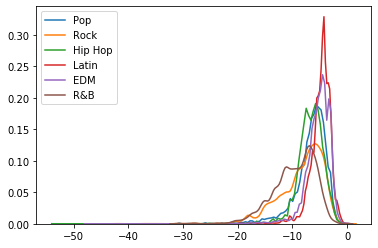

In [999]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['loudness'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['loudness'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['loudness'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['loudness'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['loudness'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['loudness'], label='R&B')

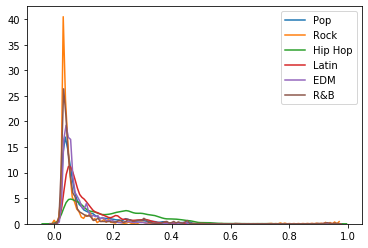

In [1000]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['speechiness'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['speechiness'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['speechiness'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['speechiness'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['speechiness'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['speechiness'], label='R&B')

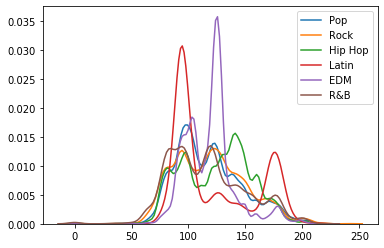

In [1001]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['tempo'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['tempo'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['tempo'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['tempo'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['tempo'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['tempo'], label='R&B')

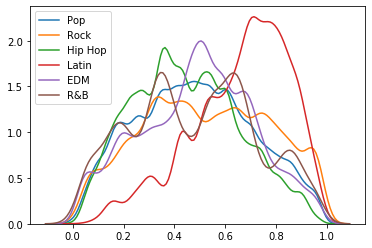

In [1002]:
sns.kdeplot(songs4algs[songs4algs['genre']=='Pop']['valence'], label= 'Pop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Rock']['valence'], label='Rock')
sns.kdeplot(songs4algs[songs4algs['genre']=='Hip_Hop']['valence'], label= 'Hip Hop')
sns.kdeplot(songs4algs[songs4algs['genre']=='Latin']['valence'], label= 'Latin')
sns.kdeplot(songs4algs[songs4algs['genre']=='EDM']['valence'], label='EDM')
sns.kdeplot(songs4algs[songs4algs['genre']=='R&B']['valence'], label='R&B')

### Statistical Significance of Differences

In [1003]:
songs4algs.columns

Index(['acousticness', 'artist', 'danceability', 'duration', 'energy', 'genre',
       'id', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'track_name', 'valence'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'genre ~ C(acousticness) + C(danceability) + C(energy) + C(instrumentalness) + C(liveness) + C(loudness)+ C(speechiness) + C(tempo) + C(valence)'
lm = ols(formula, songs4algs).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

In [5]:
songs4algs

NameError: name 'songs4algs' is not defined